In [8]:
import pandas as pd
import os
import sys

def leer_archivo(ruta_archivo: str):
    # Verificar que el archivo existe
    if not os.path.exists(ruta_archivo):
        sys.exit(f"❌ El archivo no existe: {ruta_archivo}")

    # Detectar la extensión
    extension = os.path.splitext(ruta_archivo)[1].lower()

    try:
        if extension == ".csv":
            df = pd.read_csv(
                ruta_archivo,
                thousands=",",         # ✅ interpreta comas como miles (2022, 20000)
                na_values=["", " "],   # ✅ vacíos como NaN
                keep_default_na=True
            )
        elif extension in [".xls", ".xlsx"]:
            df = pd.read_excel(ruta_archivo)
        elif extension == ".json":
            df = pd.read_json(ruta_archivo)
        else:
            sys.exit(f"⚠️ Tipo de archivo no soportado: {extension}")

        # Mostrar solo las primeras 10 filas
        print(df.head(10))
        return df

    except Exception as e:
        sys.exit(f"❌ Error al leer el archivo: {e}")

In [9]:
import matplotlib.pyplot as plt

# Ruta del archivo
ruta = "./data/num_ev.csv"
df = leer_archivo(ruta)

  COMBUSTIBLE  ESTADO  MODELO           FECHA_REGISTRO  AÑO_REGISTRO  \
0   ELECTRICO  ACTIVO    2022  2022 Jun 30 12:00:00 AM          2022   
1   ELECTRICO  ACTIVO    2023  2022 Oct 21 12:00:00 AM          2022   
2   ELECTRICO  ACTIVO    2014  2015 Sep 28 12:00:00 AM          2015   
3   ELECTRICO  ACTIVO    2021  2022 Aug 10 12:00:00 AM          2022   
4   ELECTRICO  ACTIVO    2022  2021 Oct 25 12:00:00 AM          2021   
5   ELECTRICO  ACTIVO    2023  2022 Aug 03 12:00:00 AM          2022   
6   ELECTRICO  ACTIVO    2020  2019 Oct 31 12:00:00 AM          2019   
7   ELECTRICO  ACTIVO    2022  2021 Aug 27 12:00:00 AM          2021   
8   ELECTRICO  ACTIVO    2023  2022 Sep 14 12:00:00 AM          2022   
9   ELECTRICO  ACTIVO    2020  2020 Jun 10 12:00:00 AM          2020   

  CLASIFICACION        CLASE    SERVICIO     MARCA            LINEA  ...  \
0     AUTOMOVIL          BUS     Público       BYD          BC11S01  ...   
1     AUTOMOVIL    CAMIONETA  Particular       BYD     

In [10]:
# ---------------------------
# Limpieza de columnas numéricas
# ---------------------------
# Asegurar que algunas columnas sean numéricas
cols_numericas = ["AÑO_REGISTRO", "CAPACIDAD_PASAJEROS", "POTENCIA"]
for col in cols_numericas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

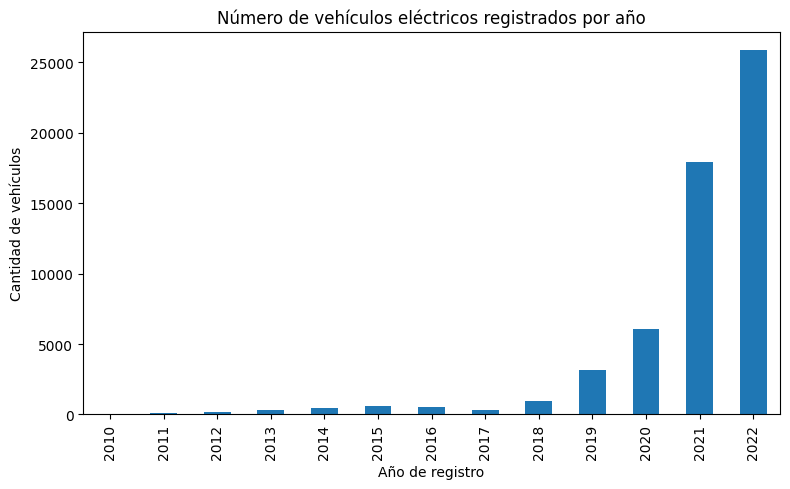

In [11]:
# ---------------------------
# 1. Vehículos registrados por año
# ---------------------------
conteo_anual = df["AÑO_REGISTRO"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
conteo_anual.plot(kind="bar")
plt.title("Número de vehículos eléctricos registrados por año")
plt.xlabel("Año de registro")
plt.ylabel("Cantidad de vehículos")
plt.tight_layout()
plt.show()

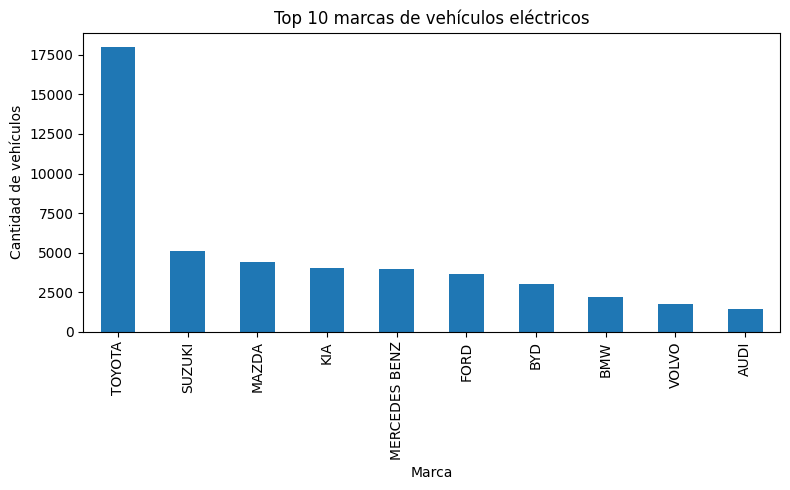

In [12]:
# ---------------------------
# 2. Distribución por marca (Top 10)
# ---------------------------
plt.figure(figsize=(8, 5))
df["MARCA"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 marcas de vehículos eléctricos")
plt.xlabel("Marca")
plt.ylabel("Cantidad de vehículos")
plt.tight_layout()
plt.show()

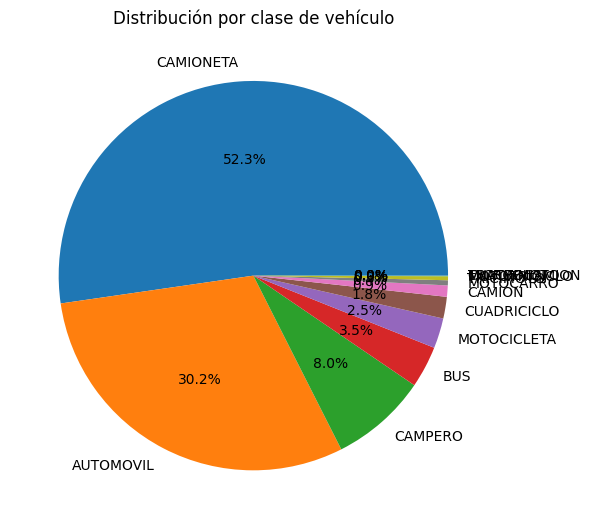

In [13]:
# ---------------------------
# 3. Clasificación por clase (Automóvil, Moto, Bus…)
# ---------------------------
plt.figure(figsize=(6, 6))
df["CLASE"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribución por clase de vehículo")
plt.ylabel("")  # Quitar etiqueta lateral
plt.tight_layout()
plt.show()

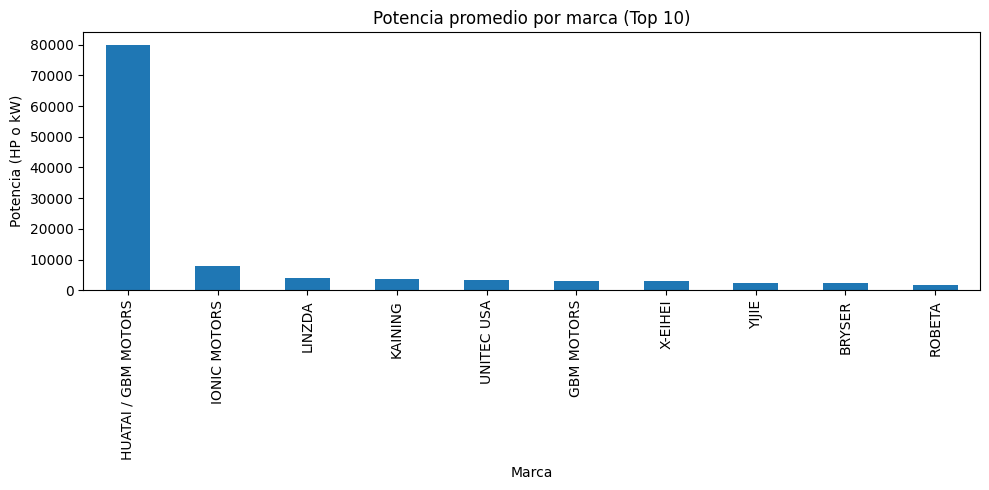

In [14]:
# ---------------------------
# 4. Potencia promedio por marca (Top 10)
# ---------------------------
if "POTENCIA" in df.columns:
    potencia_marca = df.groupby("MARCA")["POTENCIA"].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    potencia_marca.plot(kind="bar")
    plt.title("Potencia promedio por marca (Top 10)")
    plt.xlabel("Marca")
    plt.ylabel("Potencia (HP o kW)")
    plt.tight_layout()
    plt.show()

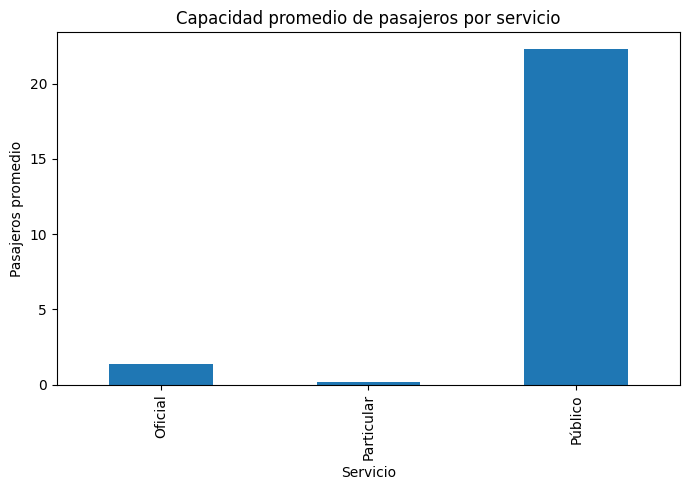

In [15]:
# ---------------------------
# 5. Capacidad de pasajeros por tipo de servicio
# ---------------------------
if "CAPACIDAD_PASAJEROS" in df.columns and "SERVICIO" in df.columns:
    plt.figure(figsize=(7, 5))
    df.groupby("SERVICIO")["CAPACIDAD_PASAJEROS"].mean().plot(kind="bar")
    plt.title("Capacidad promedio de pasajeros por servicio")
    plt.xlabel("Servicio")
    plt.ylabel("Pasajeros promedio")
    plt.tight_layout()
    plt.show()